# Monte-Carlo: A Geometical Representation

<font size="2px">Borrowed from the "Foundations of Deep Reinforcement Learning"</font>

Monte Carlo sampling refers to any method that uses random sampling to generate data used to approximate a function. In essence, it is just “approximation with random sampling."

To see how Monte Carlo works, let’s work through an example of how it can be used to estimate the value of $\pi$ (the mathematical constant)—the ratio of a circle’s circumference to its diameter. A Monte Carlo approach to solving this problem is to take a quadrant of a circle of radius $r=1$ centered at the origin and inscribe it in a square. Their areas are $\pi r^2$ and $r^2$, respectively. Hence, the ratio of these areas is simply:
## $\frac{\text{area of circle}}{\text{area of square}} = \frac{\frac{\pi r^2}{4}}{r^2}$

<center><img style="align: center;" src="https://github.com/FredAmouzgar/comp8220_ML_2021S1/raw/main/images/MC_geometrical.png" width=400></center>

clearly, when $r=1$:
## $\frac{\text{area of circle}}{\text{area of square}} = \frac{\frac{\pi r^2}{4}}{r^2} = \frac{\frac{\pi \times 1^2}{4}}{1^2} = \frac{\pi}{4}$

Numerically, the square has an area of 1, but since we do not yet know $\pi$, so the area of the circle is unknown. To obtain an estimation for $\pi$, sample many points within the square using a uniformly random distribution. A point $(x, y)$ that lands in the circle has distance less than 1 from the origin—that is, $(x − 0)^2 + (y − 0)^2 ≤ 1$. This is shown in figure. Using this, if we count the number of points in the circle, then count the number of points sampled in total, their ratio roughly equals to the equation. By iteratively sampling more points and updating the ratio, our estimation will get closer to the precise value. Multiplying this ratio by 4 gives us the estimated value of $\pi ≈ 3.14159$.

In [124]:
import matplotlib.pyplot as plt
import numpy as np
from time import sleep
from IPython.display import clear_output

def calc_π(rand):
    c = 0
    number_of_sampled = rand.shape[0]

    for i in range(number_of_sampled):
        if rand[i, 0]**2 + rand[i, 1]**2 <= 1:
            c += 1
    return (4 * c) / number_of_sampled

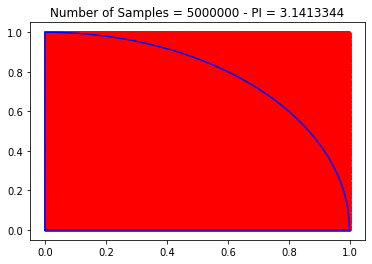

In [125]:
for n in [10, 100, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000, 200000, 500000, 1000000, 5000000]:
    rand = np.random.uniform(low=0, high=1, size=(n, 2)) # randomly selecting numbers from the uniform distribution 
    PI = calc_π(rand) # 

    clear_output(wait=True)
    x = np.linspace(start=0, stop=1, num=200)
    plt.plot(x, np.sqrt(1-x**2), c="b")
    plt.plot(x, np.zeros_like(x), c="b")
    plt.plot(np.zeros_like(x), x, c="b")
    plt.scatter(rand[:, 0], rand[:, 1], c="r", s=0.5, alpha=0.5)
    plt.title("Number of Samples = " + str(n) + " - PI = " + str(PI))
    plt.show()
    sleep(0.5)

<font size="2px">COMP8220 - MQ - Mar 2021</font>